4423680/4422102 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 

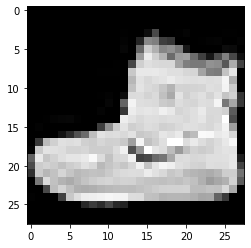

In [2]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


# 1. DataLoader
(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(X_train[0])
print(X_train[0].shape)
print(X_train.shape)
print(X_test.shape)

plt.imshow(X_train[0],cmap='gray')

# 숫자 1,3을 구분하는 것보다는 바지와 신발을 구분하는 것이 더 복잡할 수 있다.
# 어제 작엄을 바탕으로 오늘은 이미지 정확도 결과를 97% 이상으로 끌어올리는 것을 목표로 잡자.

# 2. 데이터 입력전 전처리과정 ---
# 1) 1차원으로 펼치기 2) /255 3) 원핫인코딩
L, H, W = X_train.shape # 3차원으로 출력된다...60000, 28, 28
X_train = X_train.reshape(-1, H * W)
X_test = X_test.reshape(-1, H * W)

print(X_train.shape, X_test.shape)

# 2) 스케일링
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])

# 3) one hot encoding
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# print(Y_train[0])

# 3. 모델 생성... 히든 레이어를 2개만 생성...
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (W*H,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

# 4. compile
model.compile('sgd', 'categorical_crossentropy', 'accuracy')

# 5. fit
model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)

# 6. evaluate
performance = model.evaluate(X_test, Y_test, batch_size=100)

In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

# fit... 학습할때 나오는 로그메세지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 100, validation_split = 0.2)

Epoch 1/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5331 - accuracy: 0.8160 - val_loss: 0.4246 - val_accuracy: 0.8450
Epoch 2/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5245 - accuracy: 0.8162 - val_loss: 0.4202 - val_accuracy: 0.8478
Epoch 3/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.8182 - val_loss: 0.4200 - val_accuracy: 0.8482
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.8180 - val_loss: 0.4153 - val_accuracy: 0.8484
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5081 - accuracy: 0.8226 - val_loss: 0.4130 - val_accuracy: 0.8511
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.8229 - val_loss: 0.4122 - val_accuracy: 0.8493
Epoch 7/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.8233 - val_loss: 0.4082 - val_accuracy: 0.8520
Epoch 

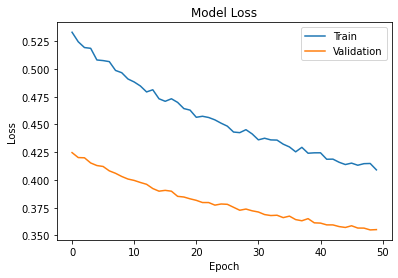

In [4]:
plot_loss(history)

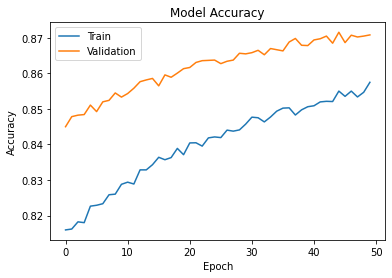

In [5]:
plot_acc(history)

### 다시 이미지 데이터 plotting 시켜놓기

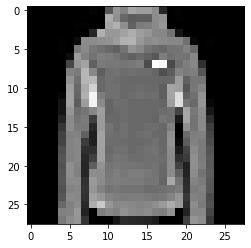

In [10]:
# 1차원으로 펼친 데이터를 다시 2차원으로 만들어 놓아야 한다

'''
interpolation은 결측값에 대해서 어떤 처리를 해줄지를 지정하는 옵션
우리는 지금 이런 옵션이 전혀 필요가 없다.
이 데이터는 이미지이기 때문에 누락데이터 있을 수 없다.
0~255의 값을 가지고 있다.
'''
plt.imshow(X_train[0].reshape(28,28), interpolation='none', cmap='gray')
plt.imshow(X_train[100].reshape(28,28), interpolation='none', cmap='gray')
plt.imshow(X_train[1020].reshape(28,28), interpolation='none', cmap='gray')
plt.imshow(X_train[10923].reshape(28,28), interpolation='none', cmap='gray')
plt.imshow(X_train[45000].reshape(28,28), interpolation='none', cmap='gray')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


### 모델 저장

In [ ]:
#######################################################
##  지금까지 학습한 weight값 저장하기
##  hdf5 파일로 저장
#######################################################

model.save('C:\encore_nsh\model.h5')